In [ ]:
# Install libraries
!pip install pybaseball
!pip install -U scikit-learn
import sys
print(sys.executable)
!pip show statsmodels




[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
/Users/nateseluga/Downloads/Batting Average Ability/Batting-Average-Ability/.venv/bin/python
Name: statsmodels
Version: 0.14.5
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: 
Author-email: 
License: BSD License
Location: /Users/nateseluga/Downloads/Batting Average Ability/Batting-Average-Ability/.venv/lib/python3.13/site-packages
Requires: numpy, packaging, pandas, patsy, scipy
Required-by: 


In [1]:
from pybaseball import batting_stats
import pandas as pd

# Define the seasons you want
years = [2018, 2019, 2020, 2021, 2022, 2023, 2024]

# Download and combine data for all years
dfs = []
for year in years:
    df_year = batting_stats(year, qual=100)
    df_year["season"] = year
    dfs.append(df_year)

# Combine into one DataFrame
df_all = pd.concat(dfs, ignore_index=True)

# Preview and save
print(df_all.shape)
print(df_all.head())

(3057, 321)
    IDfg  Season              Name Team  Age    G   AB   PA    H   1B  ...  \
0  13611    2018      Mookie Betts  BOS   25  136  520  614  180   96  ...   
1  10155    2018        Mike Trout  LAA   26  140  471  608  147   80  ...   
2  17678    2018      Alex Bregman  HOU   24  157  594  705  170   87  ...   
3  12916    2018  Francisco Lindor  CLE   24  158  661  745  183  101  ...   
4  11477    2018  Christian Yelich  MIL   26  147  574  651  187  110  ...   

   HardHit  HardHit%  Events  CStr%   CSW%    xBA   xSLG  xwOBA  L-WAR  season  
0      218     0.502     434  0.220  0.270  0.309  0.607  0.431   10.4    2018  
1      162     0.460     352  0.201  0.261  0.294  0.603  0.435    9.5    2018  
2      204     0.398     512  0.209  0.252  0.267  0.464  0.369    8.0    2018  
3      227     0.405     560  0.159  0.234  0.291  0.516  0.378    7.8    2018  
4      224     0.508     441  0.173  0.266  0.318  0.572  0.417    7.7    2018  

[5 rows x 321 columns]


Kept 25 columns. Missing: none
(3057, 25)
      id              name team  season   pa    avg  babip  bb_rate  k_rate  \
0  13611      Mookie Betts  BOS    2018  614  0.346  0.368    0.132   0.148   
1  10155        Mike Trout  LAA    2018  608  0.312  0.346    0.201   0.204   
2  17678      Alex Bregman  HOU    2018  705  0.286  0.289    0.136   0.121   
3  12916  Francisco Lindor  CLE    2018  745  0.277  0.279    0.094   0.144   
4  11477  Christian Yelich  MIL    2018  651  0.326  0.373    0.104   0.207   

   sprint_speed  ...  zcontact  contact     ld     gb     fb   iffb  hr_fb  \
0           7.0  ...     0.930    0.859  0.212  0.339  0.449  0.092  0.164   
1           5.9  ...     0.917    0.841  0.234  0.313  0.453  0.094  0.245   
2           3.6  ...     0.928    0.885  0.219  0.346  0.434  0.126  0.140   
3           5.4  ...     0.909    0.841  0.216  0.388  0.396  0.105  0.173   
4           6.8  ...     0.881    0.790  0.247  0.518  0.235  0.049  0.350   

    pull   opp

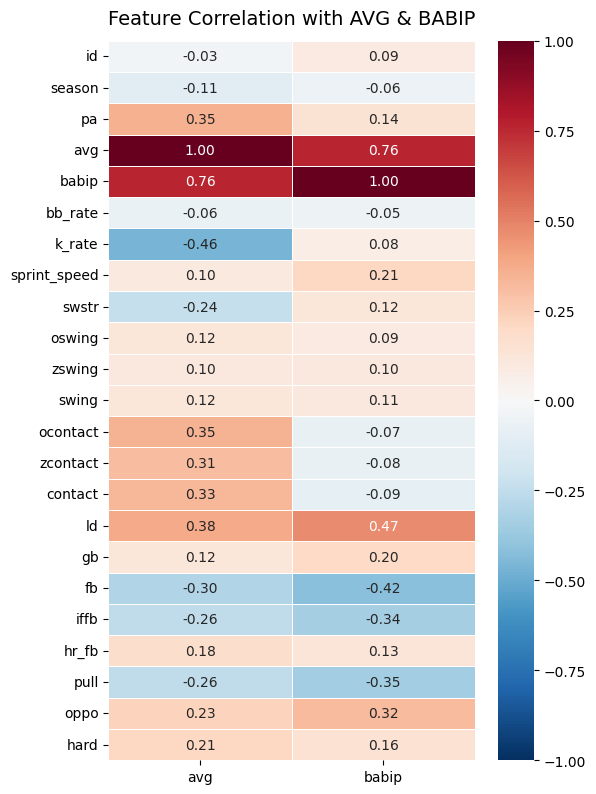


Top 10 correlated features with AVG:
avg         1.000000
babip       0.760400
ld          0.377809
pa          0.351844
ocontact    0.346436
contact     0.331907
zcontact    0.310423
oppo        0.230034
hard        0.205303
hr_fb       0.179582
Name: avg, dtype: float64

Top 10 correlated features with BABIP:
babip           1.000000
avg             0.760400
ld              0.468801
oppo            0.316630
sprint_speed    0.208520
gb              0.201260
hard            0.155813
pa              0.143409
hr_fb           0.126224
swstr           0.120059
Name: babip, dtype: float64


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# columns we want to consider
cols = [
    'IDfg','Name','Team','Season','PA','AVG','BABIP','BB%','K%','Spd',
    'SwStr%','O-Swing%','Z-Swing%','Swing%','O-Contact%','Z-Contact%','Contact%',
    'LD%','GB%','FB%','IFFB%','HR/FB','Pull%','Oppo%','Hard%'
]

# keep only the intersection
available = [c for c in cols if c in df_all.columns]
missing = [c for c in cols if c not in df_all.columns]

df_focus = df_all[available].copy()
print(f"Kept {len(available)} columns. Missing: {missing if missing else 'none'}")

# standardize column names to snake_case
rename_map = {
    'IDfg': 'id', 'Name': 'name', 'Team': 'team', 'Season': 'season', 'PA': 'pa',
    'AVG': 'avg', 'BABIP': 'babip', 'BB%': 'bb_rate', 'K%': 'k_rate', 'Spd': 'sprint_speed',
    'SwStr%': 'swstr', 'O-Swing%': 'oswing', 'Z-Swing%': 'zswing', 'Swing%': 'swing',
    'O-Contact%': 'ocontact', 'Z-Contact%': 'zcontact', 'Contact%': 'contact',
    'LD%': 'ld', 'GB%': 'gb', 'FB%': 'fb', 'IFFB%': 'iffb', 'HR/FB': 'hr_fb',
    'Pull%': 'pull', 'Oppo%': 'oppo', 'Hard%': 'hard'
}
df_focus.rename(columns=rename_map, inplace=True)

# Preview and save
print(df_focus.shape)
print(df_focus.head())

# filter to meaningful seasons
MIN_PA = 200
df_corr = df_focus[df_focus['pa'] >= MIN_PA].copy()

# select numeric columns (ignore id/name/team)
num_cols = df_corr.select_dtypes(include=[np.number]).columns.tolist()

# compute correlation matrix
corr = df_corr[num_cols].corr()

# extract only features vs AVG and BABIP
targets = ['avg', 'babip']
corr_targets = corr[targets].copy()

# plot
plt.figure(figsize=(6, max(4, 0.35 * len(corr_targets))))
sns.heatmap(corr_targets, cmap='RdBu_r', center=0, vmin=-1, vmax=1,
            linewidths=0.5, annot=True, fmt=".2f")
plt.title("Feature Correlation with AVG & BABIP", fontsize=14, pad=12)
plt.tight_layout()
plt.show()

# optional: quick sorted correlations to inspect top signals
print("\nTop 10 correlated features with AVG:")
print(corr_targets['avg'].sort_values(ascending=False).head(10))
print("\nTop 10 correlated features with BABIP:")
print(corr_targets['babip'].sort_values(ascending=False).head(10))

In [3]:
# =============================================================================
# ORION: DATA CLEANING AND PROCESSING (STEP 2)
# =============================================================================

import pandas as pd
import numpy as np

print("STEP 2: CLEAN AND PROCESS DATA")
print("=" * 40)

# Start with the focused dataset
df_clean = df_focus.copy()
print(f"Starting: {df_clean.shape}")

# 1. EXPLORATORY DATA ANALYSIS
print("\n1. Data Info:")
print(f"Shape: {df_clean.shape}")
print(f"Missing values: {df_clean.isnull().sum().sum()}")
print(f"Data types: {df_clean.dtypes.value_counts().to_dict()}")

# 2. REMOVE COLUMNS WITH LOTS OF MISSING DATA (>50%)
missing_pct = (df_clean.isnull().sum() / len(df_clean)) * 100
cols_to_drop = missing_pct[missing_pct > 50].index.tolist()
if cols_to_drop:
    df_clean = df_clean.drop(columns=cols_to_drop)
    print(f"\n2. Removed {len(cols_to_drop)} columns with >50% missing data")

# 3. REMOVE DUPLICATE PLAYERS (keep highest PA)
duplicates_before = df_clean.duplicated(subset=['name', 'season']).sum()
df_clean = df_clean.sort_values('pa', ascending=False).drop_duplicates(subset=['name', 'season'], keep='first')
print(f"\n3. Removed {duplicates_before} duplicate player-season combinations")

# 4. HANDLE TEXT DATA
# Convert team to dummy variables
if 'team' in df_clean.columns:
    team_dummies = pd.get_dummies(df_clean['team'], prefix='team')
    df_clean = pd.concat([df_clean, team_dummies], axis=1).drop(columns=['team'])

# Convert name to numeric ID (simple approach without sklearn)
if 'name' in df_clean.columns:
    unique_names = df_clean['name'].unique()
    name_to_id = {name: idx for idx, name in enumerate(unique_names)}
    df_clean['player_id'] = df_clean['name'].map(name_to_id)
    df_clean = df_clean.drop(columns=['name'])

print(f"\n4. Handled text data: {df_clean.shape}")

# 5. CONVERT DATA TYPES
for col in df_clean.columns:
    if col in ['id', 'season', 'player_id']:
        df_clean[col] = df_clean[col].astype('int32')
    else:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# 6. REMOVE OUTLIERS (conservative 3*IQR rule)
key_cols = ['avg', 'babip', 'pa', 'bb_rate', 'k_rate', 'sprint_speed']
initial_rows = len(df_clean)

for col in key_cols:
    if col in df_clean.columns:
        Q1, Q3 = df_clean[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        bounds = (Q1 - 3*IQR, Q3 + 3*IQR)
        df_clean = df_clean[(df_clean[col] >= bounds[0]) & (df_clean[col] <= bounds[1])]

print(f"\n5-6. Removed {initial_rows - len(df_clean)} outliers, converted data types")

# 7. FINAL CLEANUP
# Fill remaining missing values
df_clean = df_clean.fillna(df_clean.median(numeric_only=True))

print(f"\n7. Final dataset: {df_clean.shape}")
print(f"Missing values: {df_clean.isnull().sum().sum()}")

# Save cleaned data
df_clean.to_csv("cleaned_batting_data.csv", index=False)
print(f"\nCleaned data saved to: cleaned_batting_data.csv")
print("DATA CLEANING COMPLETE!")


STEP 2: CLEAN AND PROCESS DATA
Starting: (3057, 25)

1. Data Info:
Shape: (3057, 25)
Missing values: 0
Data types: {dtype('float64'): 20, dtype('int64'): 3, dtype('O'): 2}

3. Removed 0 duplicate player-season combinations

4. Handled text data: (3057, 55)

5-6. Removed 1 outliers, converted data types

7. Final dataset: (3056, 55)
Missing values: 0

Cleaned data saved to: cleaned_batting_data.csv
DATA CLEANING COMPLETE!


In [4]:
# Bell Train/Test Splitting
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
import pandas as pd
from sklearn.model_selection import train_test_split

# Load proccessed data
df = pd.read_csv('cleaned_batting_data.csv')

# Set X and Y
X = df.drop(columns=['avg'])
Y = df["avg"]

# Split traning and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Save datasets as csv
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
Y_train.to_csv('Y_train.csv', index=False)
Y_test.to_csv('Y_test.csv', index=False)

STEP 3: LINEAR REGRESSION (AVG)
Train: X=(1108, 54)  Y=(1108,)
Test:  X=(277, 54)   Y=(277,)

Performance:
Train -> MAE: 0.0032 | RMSE: 0.0044 | R2: 0.9839
Test  -> MAE: 0.0034 | RMSE: 0.0048 | R2: 0.9821

Top 15 absolute coefficients:
     feature  coefficient
0      babip     0.685177
1     k_rate    -0.346406
2         fb     0.243525
3         gb     0.182736
4      hr_fb     0.180759
5         ld     0.179948
6    bb_rate    -0.074018
7      swstr     0.066342
8      swing     0.050917
9   zcontact     0.048686
10    oswing    -0.039764
11   contact    -0.039097
12  ocontact     0.031295
13    zswing    -0.019614
14      hard     0.018156


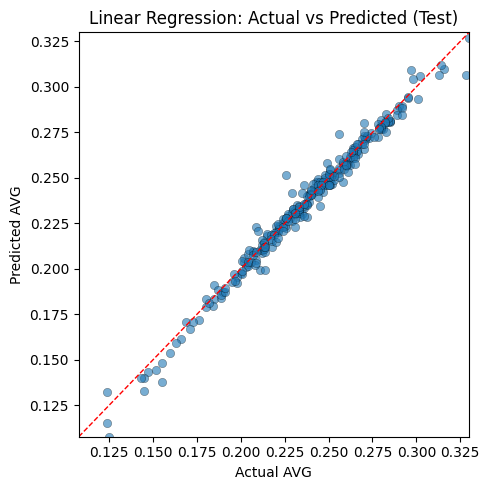


Saved model -> linear_regression_avg.pkl
Saved coefficients -> linear_regression_coefficients.csv


In [ ]:
# Linear Regression Model Training
# - Trains a baseline LinearRegression to predict AVG
# - Evaluates with MAE, RMSE, R2
# - Shows top coefficients and saves the model/coeffs

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt

# -----------------------------
# Load data
# -----------------------------
X_train = pd.read_csv("X_train.csv")
X_test  = pd.read_csv("X_test.csv")
Y_train = pd.read_csv("Y_train.csv").squeeze("columns")
Y_test  = pd.read_csv("Y_test.csv").squeeze("columns")

# Defensive: ensure target is numeric
Y_train = pd.to_numeric(Y_train, errors="coerce")
Y_test  = pd.to_numeric(Y_test, errors="coerce")

# Drop any rows with missing targets (should be none)
mask_tr = ~Y_train.isna()
mask_te = ~Y_test.isna()
X_train_lr = X_train.loc[mask_tr].copy()
Y_train_lr = Y_train.loc[mask_tr].copy()
X_test_lr  = X_test.loc[mask_te].copy()
Y_test_lr  = Y_test.loc[mask_te].copy()

print("STEP 3: LINEAR REGRESSION (AVG)")
print("=" * 40)
print(f"Train: X={X_train_lr.shape}  Y={Y_train_lr.shape}")
print(f"Test:  X={X_test_lr.shape}   Y={Y_test_lr.shape}")

# -----------------------------
# Fit model
# -----------------------------
lin = LinearRegression()
lin.fit(X_train_lr, Y_train_lr)

# -----------------------------
# Evaluate
# -----------------------------
train_pred = lin.predict(X_train_lr)
test_pred  = lin.predict(X_test_lr)

mae_tr = mean_absolute_error(Y_train_lr, train_pred)
mse_tr = mean_squared_error(Y_train_lr, train_pred)
rmse_tr = np.sqrt(mse_tr)
r2_tr = r2_score(Y_train_lr, train_pred)

mae_te = mean_absolute_error(Y_test_lr, test_pred)
mse_te = mean_squared_error(Y_test_lr, test_pred)
rmse_te = np.sqrt(mse_te)
r2_te = r2_score(Y_test_lr, test_pred)

print("\nPerformance:")
print(f"Train -> MAE: {mae_tr:.4f} | RMSE: {rmse_tr:.4f} | R2: {r2_tr:.4f}")
print(f"Test  -> MAE: {mae_te:.4f} | RMSE: {rmse_te:.4f} | R2: {r2_te:.4f}")

# -----------------------------
# Coefficients
# -----------------------------
coefs = pd.Series(lin.coef_, index=X_train_lr.columns).sort_values(key=np.abs, ascending=False)
coef_df = pd.DataFrame({"feature": coefs.index, "coefficient": coefs.values})
print("\nTop 15 absolute coefficients:")
print(coef_df.head(15))

# Save coefficients for later inspection
coef_df.to_csv("linear_regression_coefficients.csv", index=False)

# -----------------------------
# Quick scatter: actual vs predicted (test)
# -----------------------------
plt.figure(figsize=(5,5))
plt.scatter(Y_test_lr, test_pred, alpha=0.6, edgecolor="k", linewidth=0.3)
lims = [min(Y_test_lr.min(), test_pred.min()), max(Y_test_lr.max(), test_pred.max())]
plt.plot(lims, lims, "r--", lw=1)
plt.xlim(lims); plt.ylim(lims)
plt.xlabel("Actual AVG")
plt.ylabel("Predicted AVG")
plt.title("Linear Regression: Actual vs Predicted (Test)")
plt.tight_layout()
plt.show()

# -----------------------------
# Persist model
# -----------------------------
joblib.dump(lin, "linear_regression_avg.pkl")
print("\nSaved model -> linear_regression_avg.pkl")
print("Saved coefficients -> linear_regression_coefficients.csv")

# TODO: not include babip as a coefficient (perhaps as a seperate regression model)


In [ ]:
# Random Forest Model Training
# Source: https://kirenz.github.io/regression/docs/randomforest.html
from collections import OrderedDict


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
import joblib

X_rf_train = pd.read_csv("X_train.csv")
X_rf_test = pd.read_csv("X_test.csv")
Y_rf_train = pd.read_csv("Y_train.csv")
Y_rf_test = pd.read_csv("Y_test.csv")

# currently does not inclue babip since it has a dominant effect/ hinders our ability to analyze other stats
selected_features = ["gb","fb","iffb","hard","pull","oppo","sprint_speed", "contact", "zcontact", "swing", "zswing", "oswing"]

X_rf_train = X_rf_train[selected_features]
X_rf_test = X_rf_test[selected_features]

# make flatten array
Y_rf_train = np.ravel(Y_rf_train)
Y_rf_test = np.ravel(Y_rf_test)


# define hyperparamerters
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "warm_start":True,
    "oob_score":True,
    "random_state": 42,
}

# build model
reg =RandomForestRegressor(**params)

reg.fit(X_rf_train, Y_rf_train)

RandomForestRegressor(max_depth=4, min_samples_split=5, n_estimators=500,
                      oob_score=True, random_state=42, warm_start=True)

#make prediction
Y_pred = reg.predict(X_rf_test)

# evaluate model with MSE
rmse = np.sqrt(mean_squared_error(Y_rf_test, Y_pred,))
print("Root mean squre error:", rmse)


# obtain feature importance
feature_importance = reg.feature_importances_

# sort features according to importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

# plot feature importances
plt.barh(pos, feature_importance[sorted_idx], align="center")

plt.yticks(pos, np.array(selected_features)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity");

# save model
print('saved model:')
joblib.dump(reg, "rf_avg_model.pkl")

In [ ]:
# Mixed effects Model Training with CLR transform for compositional data
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

# --- BABIP feature selection ---
X_train = pd.read_csv("X_train.csv")
X_test  = pd.read_csv("X_test.csv")

babip_raw = ["ld","gb","fb","iffb","hard","pull","oppo","sprint_speed"]
carry_cols = ["id","season","pa"]

needed = babip_raw + carry_cols
missing_tr = [c for c in needed if c not in X_train.columns]
missing_te = [c for c in needed if c not in X_test.columns]

if missing_tr or missing_te:
    base = pd.read_csv("cleaned_batting_data.csv")
    join_keys = [k for k in ["id","season"] if k in X_train.columns and k in base.columns]
    if not join_keys:
        raise KeyError("Need join keys ('id','season') in X_train and cleaned_batting_data.csv to fetch missing columns.")
    fetch_cols = list(set(needed + join_keys))
    X_train = X_train.merge(base[fetch_cols].drop_duplicates(join_keys), on=join_keys, how="left")
    X_test  = X_test.merge(base[fetch_cols].drop_duplicates(join_keys),  on=join_keys, how="left")

X_babip_train = X_train[needed].copy()
X_babip_test  = X_test[needed].copy()

print("BABIP features ready.")
print("Train shape:", X_babip_train.shape, "| Test shape:", X_babip_test.shape)

base = pd.read_csv("cleaned_batting_data.csv")

join_keys = [k for k in ["id","season"] if k in X_babip_train.columns and k in base.columns]
if not join_keys:
    raise KeyError("Need 'id' and/or 'season' in both X_babip_* and cleaned_batting_data.csv")

train_babip = X_babip_train.merge(
    base[join_keys + ["babip"]].drop_duplicates(join_keys),
    on=join_keys, how="left"
)
test_babip = X_babip_test.merge(
    base[join_keys + ["babip"]].drop_duplicates(join_keys),
    on=join_keys, how="left"
)

train_babip = train_babip.dropna(subset=["babip"]).copy()

print(f"\nAfter merge and dropna: {len(train_babip)} training rows")

# =============== CLR TRANSFORMATION FOR COMPOSITIONAL DATA ===============
def centered_log_ratio(df, comp_cols):
    """
    Apply centered log-ratio transform to compositional columns.
    CLR(x) = log(x) - mean(log(x)) for each row.
    """
    comp_data = df[comp_cols].values
    # Add small epsilon to avoid log(0)
    comp_data = np.clip(comp_data, 1e-6, 1)

    # Take logs
    log_comp = np.log(comp_data)

    # Center by subtracting geometric mean (mean of logs)
    log_mean = log_comp.mean(axis=1, keepdims=True)
    clr = log_comp - log_mean

    # Create new column names
    clr_cols = [f"clr_{c}" for c in comp_cols]

    return pd.DataFrame(clr, columns=clr_cols, index=df.index)

# Apply CLR to batted ball composition (LD, GB, FB)
comp_cols = ["ld", "gb", "fb"]
other_features = ["iffb","hard","pull","oppo","sprint_speed"]

train_clr = centered_log_ratio(train_babip, comp_cols)
test_clr = centered_log_ratio(test_babip, comp_cols)

# Combine CLR features with other features
train_babip_clr = pd.concat([
    train_babip[["id","season","pa","babip"]].reset_index(drop=True),
    train_clr.reset_index(drop=True),
    train_babip[other_features].reset_index(drop=True)
], axis=1)

test_babip_clr = pd.concat([
    test_babip[["id","season","pa","babip"]].reset_index(drop=True),
    test_clr.reset_index(drop=True),
    test_babip[other_features].reset_index(drop=True)
], axis=1)

print("\n=== CLR Transform Applied ===")
print(f"Original composition example (ld, gb, fb): {train_babip[comp_cols].iloc[0].values}")
print(f"CLR transformed: {train_clr.iloc[0].values}")
print(f"CLR sum (should be ~0): {train_clr.iloc[0].sum():.6f}")

# ============ CRITICAL: DROP ONE CLR COORDINATE ============
# Drop clr_fb - use FB as reference category
print("\n✓ Dropping clr_fb to eliminate collinearity (CLR coords sum to 0)")
print("  → Effects will be relative to fly balls as baseline")

babip_fixed = ["clr_ld", "clr_gb"] + other_features
# ===========================================================

# --- Standardize all features (including CLR) ---
scaler = StandardScaler().fit(train_babip_clr[babip_fixed])
train_babip_s = train_babip_clr.copy()
test_babip_s  = test_babip_clr.copy()
train_babip_s[babip_fixed] = scaler.transform(train_babip_clr[babip_fixed])
test_babip_s[babip_fixed]  = scaler.transform(test_babip_clr[babip_fixed])

print("\nStandardized features:")
print("train_babip_s:", train_babip_s.shape, " test_babip_s:", test_babip_s.shape)
print(f"Features in model: {babip_fixed}")

# =============== PA-weighting via row replication ===============
pa = train_babip_s["pa"].astype(float)
w_float = pa / np.median(pa)
w_int   = np.clip(np.rint(w_float), 1, 20).astype(int)

idx = np.arange(len(train_babip_s))
rep_idx = np.repeat(idx, w_int)
train_exp = train_babip_s.iloc[rep_idx].copy()
print(f"\nExpanded training rows: {len(train_babip_s)} → {len(train_exp)} (PA-weighted)")
# ================================================================

# MixedLM setup
train_exp["id"] = train_exp["id"].astype("category")
test_babip_s["id"]  = test_babip_s["id"].astype("category")

# Model formula with ONLY clr_ld and clr_gb (NOT clr_fb)
formula = "babip ~ " + " + ".join(babip_fixed)
print(f"\nModel formula: {formula}")

# Try multiple fitting methods
print("\nFitting mixed effects model...")
md = smf.mixedlm(
    formula=formula,
    data=train_exp,
    groups=train_exp["id"],
    re_formula="1"
)

# Try BFGS first, then fallback
fit_babip = None
methods = [
    ("lbfgs", {"maxiter": 500, "reml": True}),
    ("bfgs", {"maxiter": 500, "reml": True}),
    ("powell", {"maxiter": 500, "reml": True})
]

for method, kwargs in methods:
    try:
        print(f"  Trying {method.upper()}...")
        fit_babip = md.fit(method=method, **kwargs, disp=False)
        if fit_babip.converged:
            print(f"  ✓ {method.upper()} converged successfully")
            break
        else:
            print(f"  ⚠ {method.upper()} did not converge, trying next method...")
    except Exception as e:
        print(f"  ✗ {method.upper()} failed: {str(e)[:50]}")
        continue

if fit_babip is None:
    raise RuntimeError("All optimization methods failed")

print("\n" + "="*70)
print("MIXED EFFECTS MODEL WITH CLR TRANSFORM")
print("="*70)
print(fit_babip.summary())

# =============== RANDOM EFFECTS DIAGNOSTICS ===============
print("\n" + "="*70)
print("RANDOM EFFECTS DIAGNOSTICS")
print("="*70)

# Extract random effects variance components correctly
re_variance = fit_babip.cov_re.iloc[0, 0] if hasattr(fit_babip, 'cov_re') else 0.0
residual_variance = fit_babip.scale

print(f"Random Intercept Variance (τ²): {re_variance:.6f}")
print(f"Residual Variance (σ²):         {residual_variance:.6f}")
print(f"Total Variance:                  {re_variance + residual_variance:.6f}")

# Intraclass Correlation Coefficient (ICC)
icc = re_variance / (re_variance + residual_variance)
print(f"\nIntraclass Correlation (ICC):    {icc:.4f}")
print(f"  → {icc*100:.2f}% of variance is between players")
print(f"  → {(1-icc)*100:.2f}% of variance is within players (residual)")

if re_variance < 0.0001:
    print("\n⚠ WARNING: Random effects variance is near zero!")
    print("  → Random effects may not be needed for this model")
    print("  → Consider using standard regression instead")
elif icc < 0.05:
    print("\n⚠ Low ICC suggests minimal player-to-player variation")
    print("  → Random effects have limited impact on predictions")

# Check convergence warnings
if hasattr(fit_babip, 'converged') and not fit_babip.converged:
    print("\n⚠ WARNING: Model did not converge properly")
    print("  → Results may be unreliable")

# Predictions
train_pred = fit_babip.predict(train_babip_s)
test_pred  = fit_babip.predict(test_babip_s)

# =============== COMPREHENSIVE MODEL EVALUATION ===============
def rmse(y, yhat):
    return np.sqrt(mean_squared_error(y, yhat))

def wmae(y, yhat, w):
    return np.average(np.abs(y - yhat), weights=w)

def wrmse(y, yhat, w):
    return np.sqrt(np.average((y - yhat)**2, weights=w))

def mape(y, yhat):
    """Mean Absolute Percentage Error"""
    return np.mean(np.abs((y - yhat) / y)) * 100

def explained_variance(y, yhat):
    """Proportion of variance explained"""
    return 1 - np.var(y - yhat) / np.var(y)

y_tr, y_te = train_babip_s["babip"].values, test_babip_s["babip"].values
w_tr, w_te = train_babip_s["pa"].values,     test_babip_s["pa"].values

print(f"\n{'='*70}")
print("MODEL PERFORMANCE - COMPREHENSIVE EVALUATION")
print(f"{'='*70}")

# Training metrics
print("\n📊 TRAINING SET PERFORMANCE:")
train_mae = mean_absolute_error(y_tr, train_pred)
train_rmse = rmse(y_tr, train_pred)
train_r2 = r2_score(y_tr, train_pred)
train_corr, _ = pearsonr(y_tr, train_pred)
train_ev = explained_variance(y_tr, train_pred)
train_mape = mape(y_tr, train_pred)

print(f"  MAE:                {train_mae:.4f}")
print(f"  RMSE:               {train_rmse:.4f}")
print(f"  R²:                 {train_r2:.4f}")
print(f"  Correlation:        {train_corr:.4f}")
print(f"  Explained Variance: {train_ev:.4f}")
print(f"  MAPE:               {train_mape:.2f}%")

# Training weighted metrics
train_wmae = wmae(y_tr, train_pred, w_tr)
train_wrmse = wrmse(y_tr, train_pred, w_tr)
print(f"\n  PA-Weighted MAE:    {train_wmae:.4f}")
print(f"  PA-Weighted RMSE:   {train_wrmse:.4f}")

# Test metrics
print("\n📊 TEST SET PERFORMANCE:")
test_mae = mean_absolute_error(y_te, test_pred)
test_rmse = rmse(y_te, test_pred)
test_r2 = r2_score(y_te, test_pred)
test_corr, _ = pearsonr(y_te, test_pred)
test_ev = explained_variance(y_te, test_pred)
test_mape = mape(y_te, test_pred)

print(f"  MAE:                {test_mae:.4f}")
print(f"  RMSE:               {test_rmse:.4f}")
print(f"  R²:                 {test_r2:.4f}")
print(f"  Correlation:        {test_corr:.4f}")
print(f"  Explained Variance: {test_ev:.4f}")
print(f"  MAPE:               {test_mape:.2f}%")

# Test weighted metrics
test_wmae = wmae(y_te, test_pred, w_te)
test_wrmse = wrmse(y_te, test_pred, w_te)
print(f"\n  PA-Weighted MAE:    {test_wmae:.4f}")
print(f"  PA-Weighted RMSE:   {test_wrmse:.4f}")

# Overfitting check
print("\n📈 GENERALIZATION CHECK:")
mae_diff = test_mae - train_mae
rmse_diff = test_rmse - train_rmse
r2_diff = train_r2 - test_r2

print(f"  MAE Difference:     {mae_diff:+.4f} ({abs(mae_diff/train_mae)*100:.1f}%)")
print(f"  RMSE Difference:    {rmse_diff:+.4f} ({abs(rmse_diff/train_rmse)*100:.1f}%)")
print(f"  R² Difference:      {r2_diff:+.4f}")

if mae_diff > 0.005 or r2_diff > 0.1:
    print("  ⚠ Possible overfitting detected")
else:
    print("  ✓ Model generalizes well")

# Baseline comparison
baseline_pred_tr = np.full_like(y_tr, y_tr.mean())
baseline_pred_te = np.full_like(y_te, y_tr.mean())  # Use training mean
baseline_mae_tr = mean_absolute_error(y_tr, baseline_pred_tr)
baseline_mae_te = mean_absolute_error(y_te, baseline_pred_te)

print("\n📊 BASELINE COMPARISON (Mean Prediction):")
print(f"  Baseline Train MAE: {baseline_mae_tr:.4f}")
print(f"  Baseline Test MAE:  {baseline_mae_te:.4f}")
print(f"  Improvement (Train): {(1 - train_mae/baseline_mae_tr)*100:.1f}%")
print(f"  Improvement (Test):  {(1 - test_mae/baseline_mae_te)*100:.1f}%")

# Residual analysis
print("\n📊 RESIDUAL ANALYSIS:")
train_resid = y_tr - train_pred
test_resid = y_te - test_pred

print(f"  Train Residual Mean: {train_resid.mean():.6f}")
print(f"  Train Residual Std:  {train_resid.std():.4f}")
print(f"  Test Residual Mean:  {test_resid.mean():.6f}")
print(f"  Test Residual Std:   {test_resid.std():.4f}")

# Prediction range check
print("\n📊 PREDICTION RANGE:")
print(f"  Actual Train:    [{y_tr.min():.3f}, {y_tr.max():.3f}]")
print(f"  Predicted Train: [{train_pred.min():.3f}, {train_pred.max():.3f}]")
print(f"  Actual Test:     [{y_te.min():.3f}, {y_te.max():.3f}]")
print(f"  Predicted Test:  [{test_pred.min():.3f}, {test_pred.max():.3f}]")

# =============== INTERPRET CLR COEFFICIENTS ===============
print("\n" + "="*70)
print("CLR COEFFICIENT INTERPRETATION (FLY BALLS = BASELINE)")
print("="*70)

params = fit_babip.params
bse = fit_babip.bse
pvalues = fit_babip.pvalues

def sig_stars(p):
    if p < 0.001: return "***"
    if p < 0.01: return "**"
    if p < 0.05: return "*"
    return ""

if "clr_ld" in params and "clr_gb" in params:
    clr_ld = params["clr_ld"]
    clr_gb = params["clr_gb"]
    clr_ld_se = bse.get("clr_ld", np.nan)
    clr_gb_se = bse.get("clr_gb", np.nan)
    clr_ld_p = pvalues.get("clr_ld", np.nan)
    clr_gb_p = pvalues.get("clr_gb", np.nan)

    print(f"\nStandardized Coefficients:")
    print(f"  clr_ld: {clr_ld:+.4f} (SE={clr_ld_se:.4f}, p={clr_ld_p:.4f}) {sig_stars(clr_ld_p)}")
    print(f"  clr_gb: {clr_gb:+.4f} (SE={clr_gb_se:.4f}, p={clr_gb_p:.4f}) {sig_stars(clr_gb_p)}")
    print(f"  clr_fb: [reference = 0.0]")

    print("\nInterpretation:")
    print(f"• LD vs FB: {clr_ld:+.4f} → Line drives {'INCREASE' if clr_ld > 0 else 'DECREASE'} BABIP vs fly balls")
    print(f"• GB vs FB: {clr_gb:+.4f} → Ground balls {'INCREASE' if clr_gb > 0 else 'DECREASE'} BABIP vs fly balls")
    print(f"• LD vs GB: {clr_ld - clr_gb:+.4f} → Line drives are {'BETTER' if clr_ld > clr_gb else 'WORSE'} than ground balls")

    print("\nRanking (highest to lowest BABIP impact):")
    batted_ball_effects = [
        ("Line Drives (LD)", clr_ld, clr_ld_p),
        ("Ground Balls (GB)", clr_gb, clr_gb_p),
        ("Fly Balls (FB)", 0.0, 1.0)
    ]
    ranked = sorted(batted_ball_effects, key=lambda x: x[1], reverse=True)
    for i, (bb_type, effect, p) in enumerate(ranked, 1):
        sig = sig_stars(p) if p < 1.0 else "(reference)"
        print(f"  {i}. {bb_type:20s}: {effect:+.4f} {sig}")

# Print all coefficients
print("\n" + "="*70)
print("ALL COEFFICIENTS")
print("="*70)
for name in params.index:
    coef = params[name]
    se = bse.get(name, np.nan)
    p = pvalues.get(name, np.nan)
    if name == "Intercept" or name == "Group Var":
        continue
    if not np.isnan(se):
        sig = sig_stars(p)
        print(f"{name:15s}: {coef:+7.4f} (SE={se:.4f}, p={p:.4f}) {sig}")
    else:
        print(f"{name:15s}: {coef:+7.4f} (SE=N/A)")

# Save predictions
pred_train = train_babip_s[["id","season"]].copy()
pred_test  = test_babip_s[["id","season"]].copy()
pred_train["babip_actual"] = y_tr
pred_train["babip_pred"] = train_pred
pred_train["residual"] = train_resid
pred_test["babip_actual"] = y_te
pred_test["babip_pred"] = test_pred
pred_test["residual"] = test_resid

pred_train.to_csv("pred_babip_train.csv", index=False)
pred_test.to_csv("pred_babip_test.csv", index=False)
print("\n✓ Saved pred_babip_train.csv and pred_babip_test.csv")

# Save CLR-transformed features for later use
train_babip_s.to_csv("train_babip_clr_features.csv", index=False)
test_babip_s.to_csv("test_babip_clr_features.csv", index=False)
print("✓ Saved CLR-transformed feature files for reference")

print("\n" + "="*70)
print("✓ MODEL TRAINING AND EVALUATION COMPLETE")
print("="*70)

BABIP features ready.
Train shape: (1108, 11) | Test shape: (277, 11)

After merge and dropna: 1108 training rows

=== CLR Transform Applied ===
Original composition example (ld, gb, fb): [0.196 0.36  0.444]
CLR transformed: [-0.47523309  0.13275628  0.34247681]
CLR sum (should be ~0): -0.000000

✓ Dropping clr_fb to eliminate collinearity (CLR coords sum to 0)
  → Effects will be relative to fly balls as baseline

Standardized features:
train_babip_s: (1108, 12)  test_babip_s: (277, 12)
Features in model: ['clr_ld', 'clr_gb', 'iffb', 'hard', 'pull', 'oppo', 'sprint_speed']

Expanded training rows: 1108 → 1341 (PA-weighted)

Model formula: babip ~ clr_ld + clr_gb + iffb + hard + pull + oppo + sprint_speed

Fitting mixed effects model...
  Trying LBFGS...


/Users/nateseluga/Downloads/Batting Average Ability/Batting-Average-Ability/.venv/lib/python3.13/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)


  ✓ LBFGS converged successfully

MIXED EFFECTS MODEL WITH CLR TRANSFORM
         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: babip    
No. Observations:  1341    Method:             REML     
No. Groups:        587     Scale:              0.0007   
Min. group size:   1       Log-Likelihood:     2749.3802
Max. group size:   6       Converged:          Yes      
Mean group size:   2.3                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     0.290    0.001 279.224 0.000  0.288  0.292
clr_ld        0.022    0.001  21.465 0.000  0.020  0.024
clr_gb        0.010    0.001   8.909 0.000  0.008  0.012
iffb         -0.002    0.001  -1.692 0.091 -0.004  0.000
hard          0.010    0.001   9.903 0.000  0.008  0.012
pull         -0.002    0.001  -1.649 0.099 -0.005  0.000
oppo          0.004    0.

/Users/nateseluga/Downloads/Batting Average Ability/Batting-Average-Ability/.venv/lib/python3.13/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
